## SEGMENTACIÓN Y CLASIFICACIÓN APLICADA EN EL CAMPO DEL MERCADEO

Los datos presentados son ficticios y han sido creados con fines académicos. Fueron diseñados con el objetivo de segmentar o categorizar a clientes ficticios basándose en diversos atributos que los encuestados podrían considerar importantes a la hora de comprar productos en una tienda, como parte de un ejercicio académico.

Dentro del dataset también se incorporan variables discriminantes que se utilizan para caracterizar demográficamente a cada "encuestado". Aunque estas variables y las respuestas son inventadas, proporcionan un contexto que podría usarse para practicar, entender mejor y analizar cómo las características demográficas podrían influir en las calificaciones dadas por cada encuestado en una situación real.

# Importar librerias

In [255]:
import pandas as pd
#######################################################
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
#######################################################
from sklearn.cluster import KMeans
#######################################################
from sklearn.decomposition import PCA
#######################################################
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Cargamos la data  

Mostramos las primeras filas para entender la estructura de los datos

In [256]:
data = pd.read_excel('Data.xlsx')
data.head()

,Identificador,Multitud de opciones,Tecnología,Mobiliario,Nivel de servicio,Precios reducidos,Condiciones de devolución,Professional,Ingresos,Edad
0,Encuestado 1,7,7,7,4,1,3,1,20000,23
1,Encuestado 2,5,4,2,5,7,9,0,20000,23
2,Encuestado 3,5,2,3,5,8,7,0,19000,22
3,Encuestado 4,7,4,4,5,7,8,0,18000,23
4,Encuestado 5,3,7,4,10,1,6,1,50000,40


# Identificamos las variables: segmentación y  discriminantes

- Segementación: Estas variables representan diferentes características o atributos que se consideran al segmentar a los clientes o usuarios.

- Discriminantes: Estas variables se utilizan para discriminar o clasificar a los clientes o usuarios en diferentes segmentos basados en características demográficas o socioeconómicas. 

In [259]:
var_segmentacion = ["Multitud de opciones", "Tecnología", "Mobiliario","Nivel de servicio", "Precios reducidos", "Condiciones de devolución"]
var_discriminantes = ["Professional", "Ingresos", "Edad"]

# Gráficamos el dendograma

Definimos una función que nos permita realizar un dendograma seleccionando los tipos de variables

In [260]:
def Dendograma (variables, tipo_variable):
    
    data_segmentation = data[variables]

    # Normalizamos la data
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data_segmentation)

    # Aplicamos el algoritmo de clustering jerárquico
    linked = linkage(data_normalized, 'ward')

    # Graficamos el dendrograma
    plt.figure(figsize=(15, 7))
    dendrogram(linked, truncate_mode='level', p=5)
    plt.title(f"Dendrograma con variables de {tipo_variable}")
    plt.xlabel('Índices de las observaciones')
    plt.ylabel('Distancia')
    plt.show()

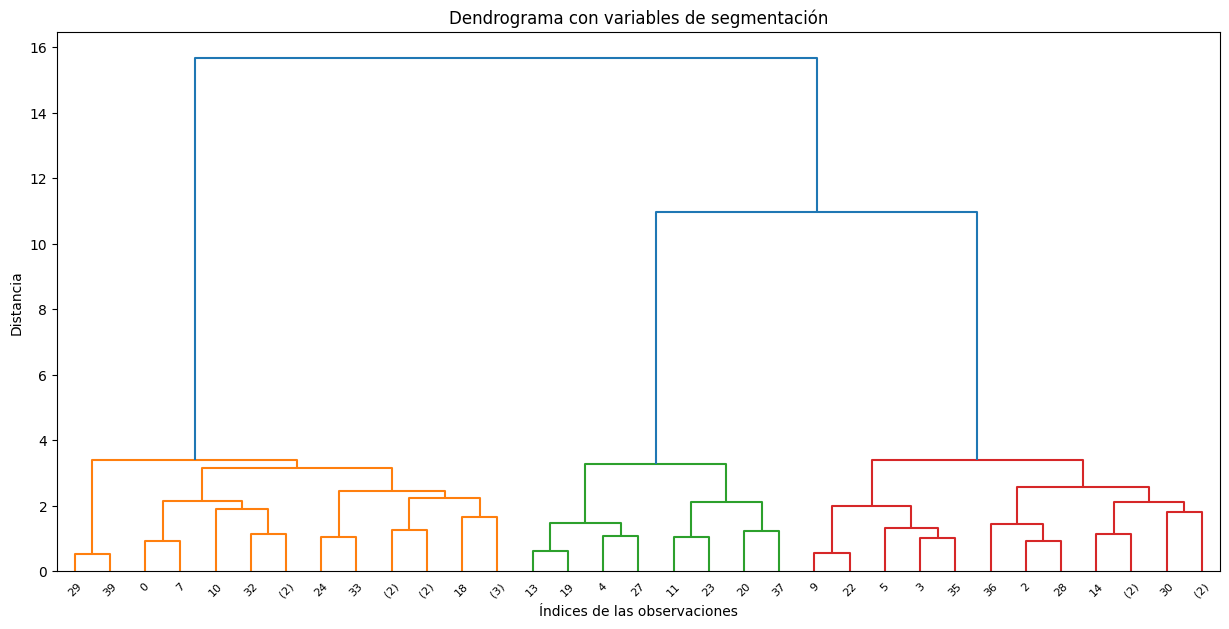

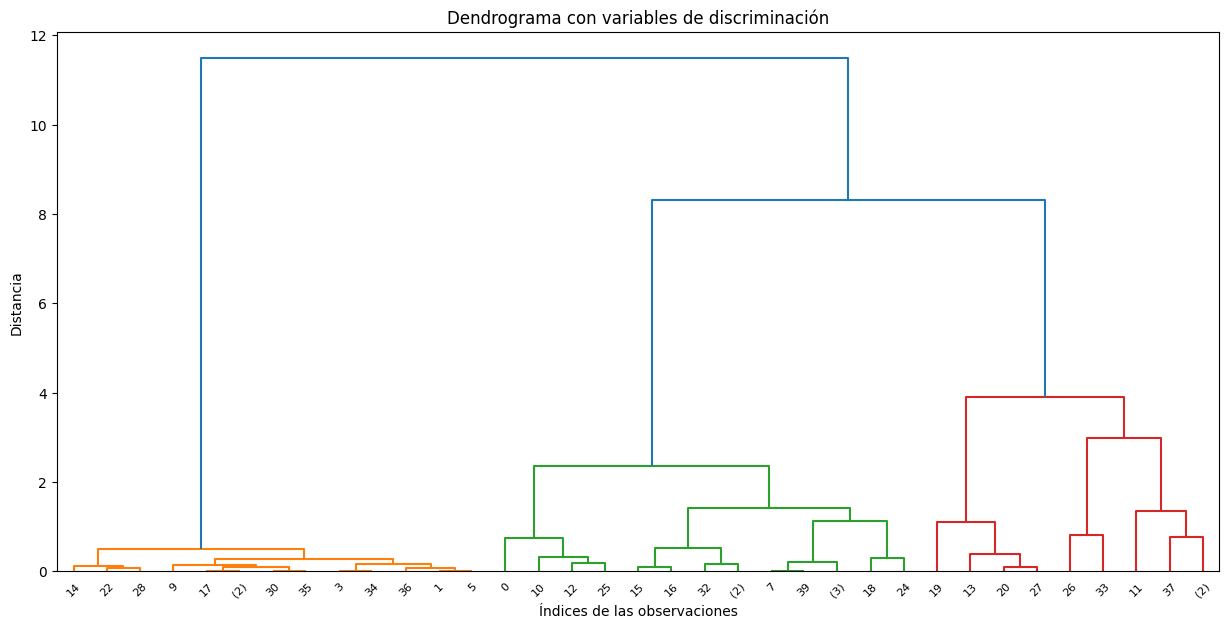

In [261]:
Dendograma(var_segmentacion, "segmentación")
Dendograma(var_discriminantes, "discriminación")

En los dos casos se puede ver claramente que hay tres grupos diferenciados.

# Definimos los n segmentos óptimos

Analizamos el número de segmentos óptimos usando la técnica del codo y Kmeans.

In [262]:
def Codo (variables, tipo_variable):
    
    data_segmentation = data[variables]

    # Normalizamos la data
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data_segmentation)
    
    wcss = []
    range_clusters = range(1, 15)

    for i in range_clusters:
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data_normalized)
        wcss.append(kmeans.inertia_)

    # Graficamos el método del codo
    plt.figure(figsize=(15, 7))
    plt.plot(range_clusters, wcss, marker='o', linestyle='--')
    plt.title(f'Método del Codo con variables de {tipo_variable}')
    plt.xlabel('Número de clusters')
    plt.ylabel('WCSS')
    plt.show()


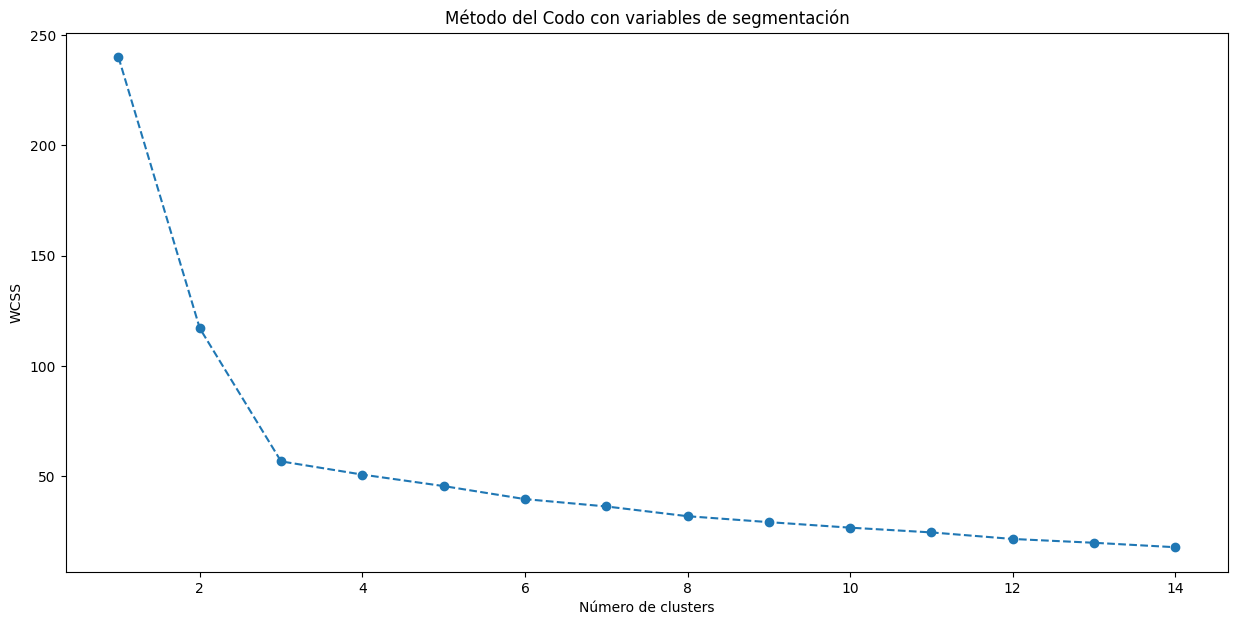

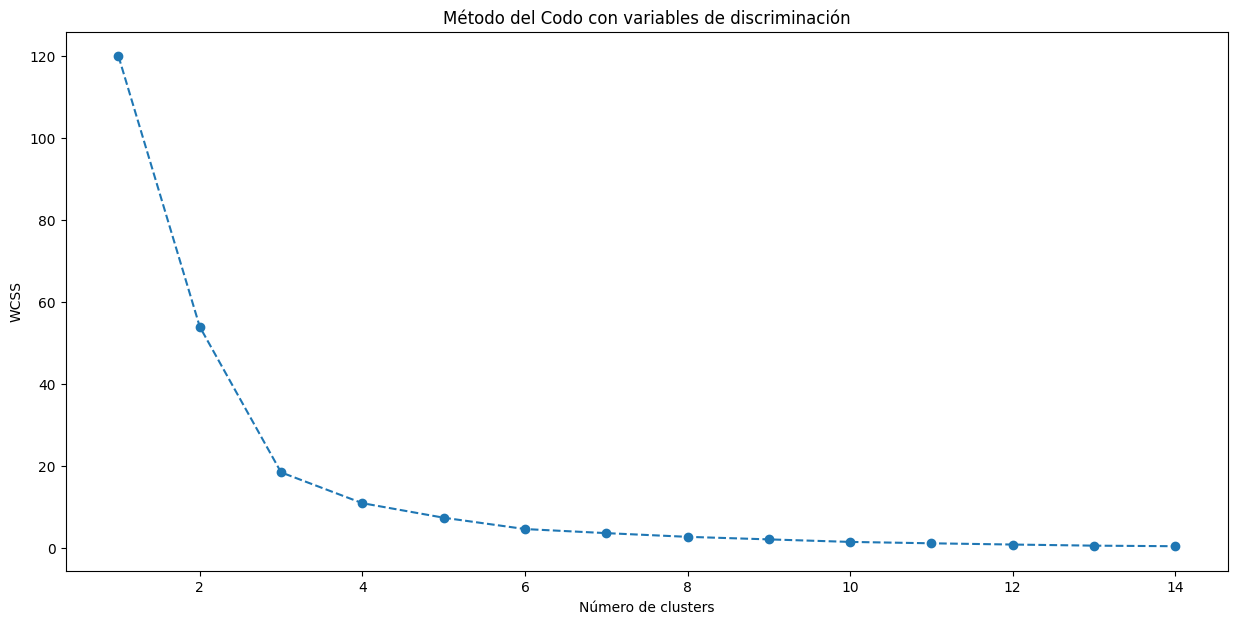

In [263]:
Codo(var_segmentacion, "segmentación")
Codo(var_discriminantes, "discriminación")

Gráficamente podemos ver que el número ótimo de segmentos para los dos casos es 3

# Graficamos los segmentos

Por medio de la técnica de componentes principales se reducen las variables a 2 componentes o dos dimensiones para luego en un mapa de espacios conjuntos g´rficar los 3 segmentos.

In [264]:
def Clusters (variables, tipo_variable, n_segmentos):

    data_segmentation = data[variables]

    # Normalizamos la data
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data_segmentation)


    kmeans = KMeans(n_clusters=n_segmentos, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(data_normalized)
    
    data["Segmento"] = clusters
    data.to_excel("data_segmentada.xlsx")

    # Usamos PCA para reducir la dimensionalidad
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_normalized)
    
    

    # Graficamos el espacio de segmentos
    plt.figure(figsize=(15, 7))
    for i in range(1,n_segmentos+1):
        plt.scatter(data_pca[clusters == i-1, 0], data_pca[clusters == i-1, 1], label=f'Segmento {i}', s=100)


    # Flechas de características
    for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        plt.arrow(0, 0, comp1*5, comp2*5, color='r', alpha=0.7)
        plt.text(comp1*3.5, comp2*3.5, data_segmentation.columns[i], color='black', ha='center', va='center', size=10)



    plt.title(f'Espacio de segmento con PCA - variables de {tipo_variable}')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return


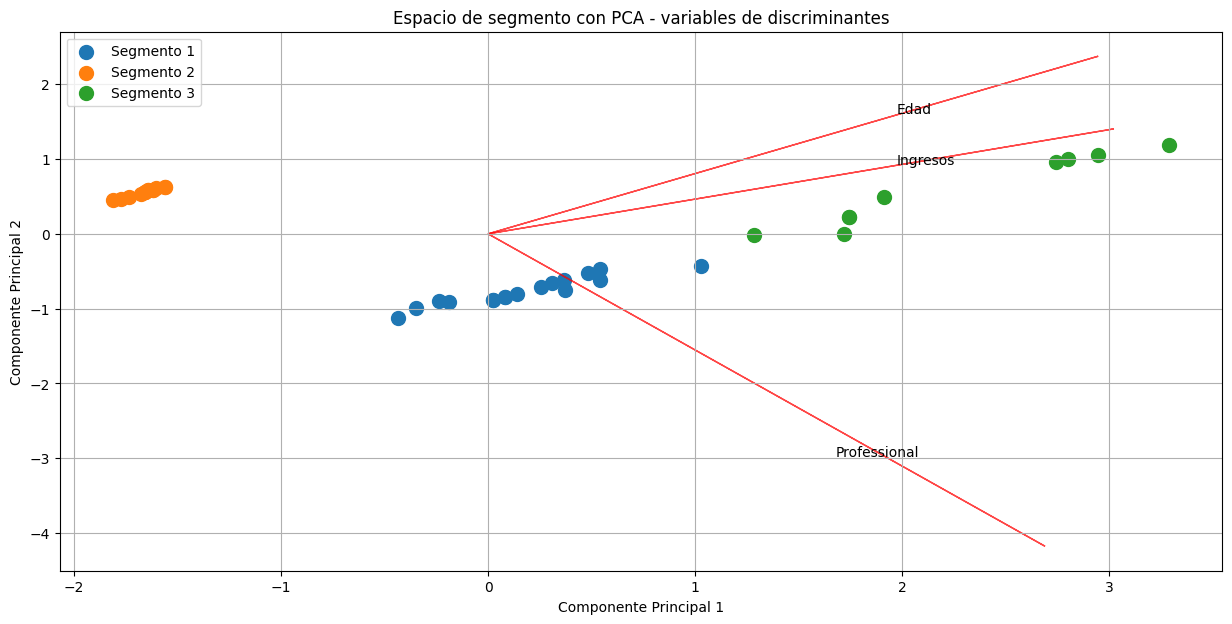

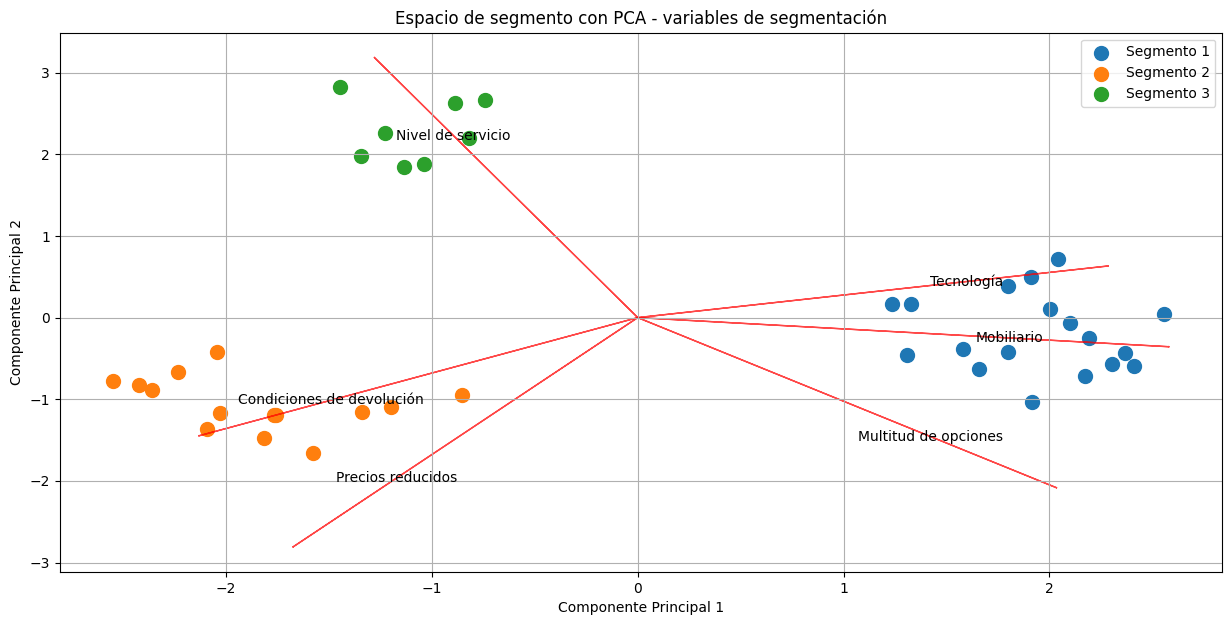

In [265]:
Clusters (var_discriminantes, "discriminantes", 3)
Clusters (var_segmentacion, "segmentación", 3)

La segmentación bidimensional de las variables discriminantes muestra que la Edad, Ingreso y Profesión son especialmente predictivas para los segmentos 1 y 3, destacándose principalmente en el primer componente principal. Estos atributos parecen menos relevantes para el segmento 2, que parece incluir individuos más jóvenes, con ingresos más bajos y sin una profesión establecida.

En cuanto a la segmentación utilizando variables inicialmente definidas, se identifican claramente tres grupos. El segmento 3, principalmente influenciado por el nivel de servicio, el segmento 2, caracterizado por condiciones de devolución favorables y precios bajos, y el segmento 1, que muestra una preferencia hacia la tecnología, muebles y diversas opciones.

# Clasificar los agrupamientos de las variables de segmentación a partir de las variables discriminantes

Después de segmentar la data utilizando variables específicas ("de segmentación"), podemos intentar clasificarla usando variables discriminantes, ya que podríamos no tener siempre acceso a los atributos prioritarios de los clientes. En tales casos, es esencial usar las variables disponibles que caracterizan a la población, y una regresión logística multiclase podría ser una herramienta útil para este propósito.

Preparamos los datos

In [266]:
data = pd.read_excel('Data_segmentada.xlsx')
df = data[["Professional", "Ingresos", "Edad", "Segmento"]]
df.head()

,Professional,Ingresos,Edad,Segmento
0,1,20000,23,0
1,0,20000,23,1
2,0,19000,22,1
3,0,18000,23,1
4,1,50000,40,2


# Realizamos la división de Datos, el entrenamiento del modelo, la predicción, evaluación del modelo con datos de entrenamiento e impresión de resultados

In [268]:
# Dividir datos en entrenamiento y prueba
X = df[['Professional', "Ingresos",'Edad']]
y = df['Segmento']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Entrenar el modelo de regresión logística multinomial
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

# Predecir los segmentos en el conjunto de prueba
y_pred = logreg.predict(X_train)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print(accuracy)
print(report)

0.95
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00        10
           2       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.96      0.89      0.91        20
weighted avg       0.96      0.95      0.95        20



# Realizamos la evaluación del modelo con datos de prueba e impresión de resultados

In [269]:
# Predecir los segmentos en el conjunto de prueba
y_pred = logreg.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.8
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.67      1.00      0.80         4
           2       1.00      0.60      0.75         5

    accuracy                           0.80        20
   macro avg       0.83      0.81      0.79        20
weighted avg       0.83      0.80      0.80        20



# Concluimos 

---

Los resultados indican que el modelo de regresión logística multinomial tiene un rendimiento bastante sólido, pero muestra una variabilidad en su desempeño dependiendo de si se evalúa con datos de entrenamiento o de prueba.

1. **Datos de Prueba**:
   - El modelo tiene una precisión impresionante del 95% en el conjunto de datos de prueba.
   - Todas las clases (0, 1, 2) tienen precisiones y recalls altos, excepto la clase 2, que tiene un recall del 67%. Esto indica que el modelo tiene dificultades para identificar correctamente todos los casos verdaderos de la clase 2.  
   

2. **Datos de Entrenamiento**:
   - En el conjunto de entrenamiento, el modelo tiene una precisión global del 80%.
   - Aunque las precisiones son altas para todas las clases, el recall para la clase 2 es solo del 60%, lo que indica una identificación incompleta de los casos verdaderos de esta clase.


El modelo parece estar bien ajustado y tiene un buen rendimiento general, pero muestra una cierta dificultad para identificar completamente la clase 2 en ambos conjuntos de datos. Además, el hecho de que el rendimiento en el conjunto de datos de prueba sea mejor que en el conjunto de entrenamiento podría ser una señal de que el modelo se benefició de la variabilidad en los datos de prueba o que podría haber alguna peculiaridad en la división de los datos.


El modelo de clasificación demostró ser efectivo para asignar futuros clientes a uno de los tres segmentos identificados. Este enfoque facilita la implementación de estrategias de marketing personalizadas dentro de un plan de mercadotecnia comprehensivo, permitiendo una diferenciación y posicionamiento de marca más efectivos y enfocados.
